In [2]:
import pandas as pd
from pathlib import Path

# Full path to the dataset
data_path = Path(r"C:\Users\Abhijeet\UIDAI-Data-Hackathon\UIDAI-Data-Hackathon\dataset\enrolment.csv")

# Check if the file exists
if not data_path.exists():
    raise FileNotFoundError(f"{data_path} not found")
    
# Load the dataset
df = pd.read_csv(data_path)
# Preview the first rows

df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,01-09-2025,Maharashtra,Mumbai Suburban,400024,1,0,0
1,01-09-2025,Maharashtra,Mumbai Suburban,400050,0,1,0
2,01-09-2025,Maharashtra,Mumbai Suburban,400053,4,0,0
3,01-09-2025,Maharashtra,Mumbai Suburban,400057,0,1,0
4,01-09-2025,Maharashtra,Mumbai Suburban,400070,4,3,0


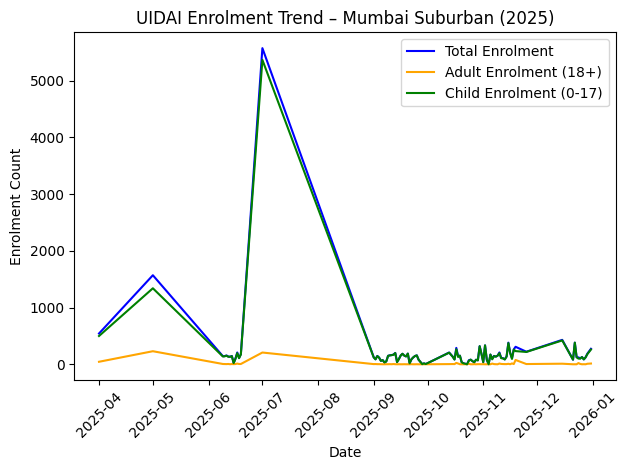

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date column (DD-MM-YYYY)
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# Filter Maharashtra & Mumbai Suburban
df_mumbai = df[
    (df["state"] == "Maharashtra") &
    (df["district"] == "Mumbai Suburban")
]

# Create enrolment columns
df_mumbai["child_enrolment"] = df_mumbai["age_0_5"] + df_mumbai["age_5_17"]
df_mumbai["adult_enrolment"] = df_mumbai["age_18_greater"]
df_mumbai["total_enrolment"] = df_mumbai["child_enrolment"] + df_mumbai["adult_enrolment"]

# Choose year
year = 2025
df_year = df_mumbai[df_mumbai["date"].dt.year == year]

# Group by date
daily = df_year.groupby("date")[["total_enrolment", "adult_enrolment", "child_enrolment"]].sum()

# Line chart
plt.figure()
plt.plot(daily.index, daily["total_enrolment"], label="Total Enrolment", color="blue")
plt.plot(daily.index, daily["adult_enrolment"], label="Adult Enrolment (18+)", color="orange")
plt.plot(daily.index, daily["child_enrolment"], label="Child Enrolment (0-17)", color="green")

plt.xlabel("Date")
plt.ylabel("Enrolment Count")
plt.title(f"UIDAI Enrolment Trend – Mumbai Suburban ({year})")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
